# Pokemon Data Exploration
## by Logan Vega

## Preliminary Wrangling

This document explore a dataset containing information on all the Pokemon species from the first 7 generations (807).

In [244]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [245]:
# load dataset into df
df = pd.read_csv('pokemon_data.csv')

In [246]:
# overview of data
df.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense,evolves_from_species_id,capture_rate,is_legendary,is_mythical
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65,0,45,0,0
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80,1,45,0,0
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100,2,45,0,0
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50,0,45,0,0
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65,4,45,0,0
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85,5,45,0,0
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64,0,45,0,0
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80,7,45,0,0
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105,8,45,0,0
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20,0,255,0,0


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       807 non-null    int64  
 1   species                  807 non-null    object 
 2   generation_id            807 non-null    int64  
 3   height                   807 non-null    float64
 4   weight                   807 non-null    float64
 5   base_experience          807 non-null    int64  
 6   type_1                   807 non-null    object 
 7   type_2                   405 non-null    object 
 8   hp                       807 non-null    int64  
 9   attack                   807 non-null    int64  
 10  defense                  807 non-null    int64  
 11  speed                    807 non-null    int64  
 12  special-attack           807 non-null    int64  
 13  special-defense          807 non-null    int64  
 14  evolves_from_species_id  8

In [248]:
df.shape

(807, 18)

In [249]:
df.describe()

,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense,evolves_from_species_id,capture_rate,is_legendary,is_mythical
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,404.000000,3.714994,1.162454,61.771128,144.848823,68.748451,76.086741,71.726146,65.830235,69.486989,70.013631,176.695167,98.032218,0.058240,0.023544
std,233.105126,1.944148,1.081030,111.519355,74.953116,26.032808,29.544598,29.730228,27.736838,29.439715,27.292344,244.963356,75.917883,0.234343,0.151717
min,1.000000,1.000000,0.100000,0.100000,36.000000,1.000000,5.000000,5.000000,5.000000,10.000000,20.000000,0.000000,3.000000,0.000000,0.000000
25%,202.500000,2.000000,0.600000,9.000000,66.000000,50.000000,55.000000,50.000000,45.000000,45.000000,50.000000,0.000000,45.000000,0.000000,0.000000
50%,404.000000,4.000000,1.000000,27.000000,151.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000,0.000000,60.000000,0.000000,0.000000
75%,605.500000,5.000000,1.500000,63.000000,179.500000,80.000000,95.000000,89.000000,85.000000,90.000000,85.000000,330.000000,152.500000,0.000000,0.000000
max,807.000000,7.000000,14.500000,999.900000,608.000000,255.000000,181.000000,230.000000,160.000000,173.000000,230.000000,803.000000,255.000000,1.000000,1.000000


### What is the structure of your dataset?

There are 807 Pokemon species in the dataset with height/weight, experience, battle statistics, evolution, capture rate, and legendary/mythical features. Most columns are numeric, but type is qualitative and nominal. 

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in finding out how Pokemon types compare with each other, in areas such as more/less common, more/less powerful, and legendary/mythical status. I am also interested in predictors of pokemon battle stat values.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Battle statistics (hp, attack, defense, speed, special attack, and special defense) determine how powerful a Pokemon is, evolves_from_species_id determines if a pokemon evolves into another species or not, is_legendary/mythical determines if a pokemon is a rare and special Pokemon, and capture_rate determines how easy it is to capture the Pokemon.

## Univariate Exploration

I will start by looking at the frequency of each Pokemon's type(s)

In [250]:
# combine type_1 and type_2 columns in separate df to use when comparing types as a whole
types_df = df.melt(id_vars= ['id', 'species'], value_vars= ['type_1', 'type_2'], var_name= 'type_tier', value_name= 'type').dropna()

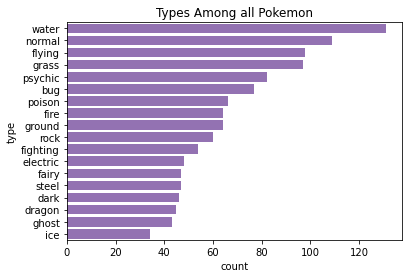

In [251]:
# plot ordered countplot of types
order = types_df['type'].value_counts().index
std_color = sb.color_palette()[4]
sb.countplot(data= types_df, y= 'type', color= std_color, order= order)
plt.title('Types Among all Pokemon');

Water is definitively the most common type and ice the least common. There appears to be about 4 times as many water types as ice types. I wonder if there is a similar distribution among Pokemon with only 1 type and with dual-type Pokemon. 

In [252]:
# function to create a new column is_dual_type to identify pokemon with 2 types
def is_dual(row):
    if row['type_2'] != row['type_2']:
        dual = 0
    else:
        dual = 1
    return dual

In [253]:
#apply function to df to add new column
df['is_dual_type'] = df.apply(is_dual, axis= 1)

In [254]:
# get single-typed and dual-typed pokemon
single_type = df.query('is_dual_type == False')
dual_type = df.query('is_dual_type == True')

# melt dual types into 1 column
dual_type = dual_type.melt(id_vars= ['id', 'species'], value_vars= ['type_1', 'type_2'], var_name= 'type_tier', value_name= 'type')

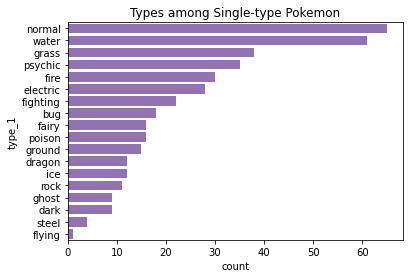

In [255]:
# plot ordered countplot for single-typed pokemon
order = single_type['type_1'].value_counts().index
sb.countplot(data= single_type, y= 'type_1', color= std_color, order= order)
plt.title('Types among Single-type Pokemon');

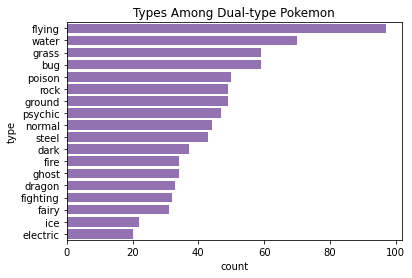

In [256]:
# plot ordered countplot for dual-typed pokemon
order = dual_type['type'].value_counts().index
sb.countplot(data= dual_type, y= 'type', color= std_color, order= order)
plt.title('Types Among Dual-type Pokemon');

Interestingly, flying-type Pokemon are by far the most common dual-type and least common single type, and are third most common overall. Water pokemon are the second most common for both single and dual-types. Ice, the least common type, is not the least common among single or dual types. I wonder if the flying type is usually paired with a certain type.

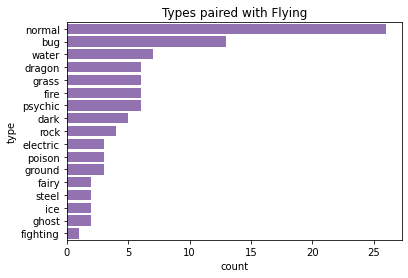

In [257]:
# get dual-types that are flying
flying_types = df.query('is_dual_type == 1 and (type_1 == "flying" or type_2 == "flying")')

# melt types into 1 column
flying_types = flying_types.melt(id_vars= ['id', 'species'], value_vars= ['type_1', 'type_2'], var_name= 'type_tier', value_name= 'type')

# remove flying rows since they are redundant
flying_types = flying_types.query('type != "flying"')

# plot ordered countplot for flying-types pokemon
order = flying_types['type'].value_counts().index
sb.countplot(data= flying_types, y= 'type', color= std_color, order= order)
plt.title('Types paired with Flying');

It looks like flying types are often also normal or bug types. Dragon type is higher up the list than the overall popularity. The rest of the distribution appears to be about what would be expected among type popularities overall.

I wonder if there is something special about the few pokemon that are only flying type.

In [258]:
# query all single-typed flying pokemon
single_type.query('type_1 == "flying"')

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense,evolves_from_species_id,capture_rate,is_legendary,is_mythical,is_dual_type
640,641,tornadus,5,1.5,63.0,261,flying,NaN,79,115,70,111,125,80,0,3,1,0,0


There is only 1 exclusively flying type pokemon, and it is legendary. I wonder how many pokemon are legendary, mythical, or neither.

In [259]:
# get numbers of legendary, mythical, and neither
n_legendary = df.query('is_legendary == 1').shape[0]
n_mythical = df.query('is_mythical == 1').shape[0]
n_neither = df.shape[0] - (n_legendary + n_mythical)

# get proportions of each
p_legendary = n_legendary / df.shape[0]
p_mythical = n_mythical / df.shape[0]
p_neither = n_neither / df.shape[0]

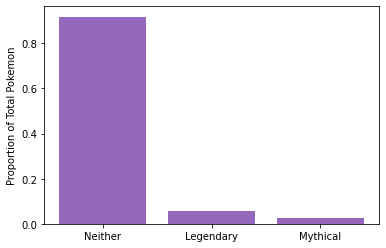

In [260]:
# plot bar graph of proportions
plt.bar([0, 1, 2], [p_neither, p_legendary, p_mythical], color= std_color)
plt.ylabel('Proportion of Total Pokemon')
plt.xticks([0, 1, 2], ['Neither', 'Legendary', 'Mythical']);

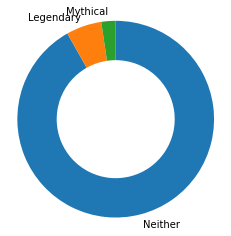

In [261]:
# plot donut plot of legendary/mythical status
plt.pie([n_neither, n_legendary, n_mythical], labels= ['Neither', 'Legendary', 'Mythical'], startangle= 90, 
        counterclock= False, wedgeprops = {'width' : 0.4});
plt.axis('square');

Almost all pokemon are neither legendary or mythical. Less than 10% are legendary and less than 5% are mythical. Next I will look at how many Pokemon species are evolutions of other species.

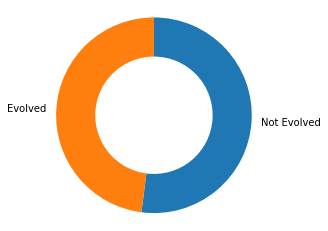

In [262]:
# get number of pokemon that are and are not evolved from a different species
n_evolved = df.query('evolves_from_species_id != 0').shape[0]
n_not_evolved = df.shape[0] - n_evolved

# plot donut plot of evolved/not evolved pokemon
plt.pie([n_not_evolved, n_evolved], labels= ['Not Evolved', 'Evolved'], startangle= 90, 
        counterclock= False, wedgeprops = {'width' : 0.4});
plt.axis('square');

The number of pokemon that are evolved from a different species is relatively equal to the pokemon that are not evolved or do not evolve.

Next I will look at pokemon battle stats (hp, attack, special attack, defense, special defense, and speed).I will add a total stats column that is the summation of these stats for each pokemon, which provides a single metric to measure Pokemon strength.

In [263]:
df['total_stats'] = df['hp'] + df['attack'] + df['special-attack'] + df['defense'] + df['special-defense'] + df['speed']

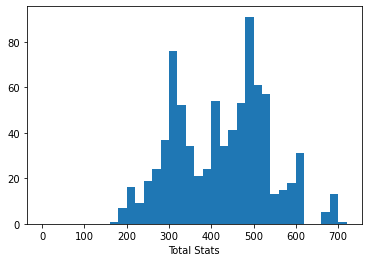

In [264]:
# plot histogram of stat totals
bins = np.arange(0,df['total_stats'].max()+20, 20)
plt.hist(data= df, x= 'total_stats', bins= bins)
plt.xlabel('Total Stats');

The distribution looks bimodal, with concentrations around 300 and 500. There is a small group around 700 that have stats high above the rest.

Next I will look at capture rates.

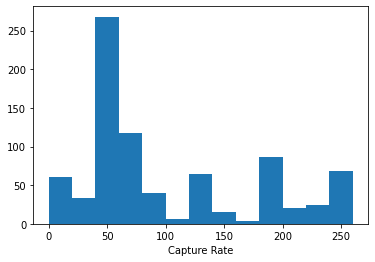

In [265]:
# plot histogram of capture rates
bins = np.arange(0,df['capture_rate'].max()+20, 20)
plt.hist(data= df, x= 'capture_rate', bins= bins)
plt.xlabel('Capture Rate');

The distribution is right skewed, with the main concentration around 50. Lower capture rate means the Pokemon is harder to obtain.

Next I will look at how many Pokemon were introduced in each generation.

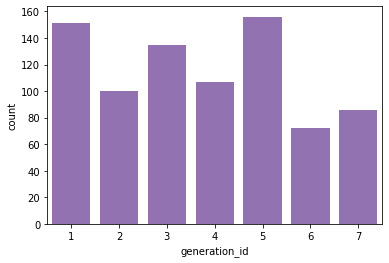

In [266]:
# plot countplot for number of pokemon added in each generation
sb.countplot(data= df, x= 'generation_id', color= std_color);

Most pokemon were added in generations 1, 3, and 5, with the least amount added in the 2 newest generations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Water is the most common Pokemon type and Ice the least common type. When looking at only single type pokemon, normal is the most common and flying the least common. Among dual types, flying is by far the most common and electric the least common. No transformations were needed. Also, water is by far the most common pokemon type overall, and has about equal distribution between single- and dual-type Pokemon.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The flying type is the most common among dual types but among single types there was only 1 flying-type pokemon. Overall, it is the 3rd most common type. This suggests flying is a type that is almost exclusively paired with another type, but is quite common when doing so. The flying type is most often paired with the normal or bug type. Also, the distribution of total battle stats was bimodal but had a small group of pokemon that had stats high above the rest. No adjustments were needed to the data as it was not a result of data error and are facts important to the analysis.

## Bivariate Exploration


No Pokemon is legendary and mythical, so these columns can be combined into 1.

In [267]:
# make new column to categorize: legendary, mythical, and neither
def leg_myth(row):
    if row['is_legendary']:
        status = 'Legendary'
    elif row['is_mythical']:
        status = 'Mythical'
    else:
        status = 'Neither'
    return status

df['legendary_or_mythical'] = df.apply(leg_myth, axis=1)

In [268]:
# add new column is_evolved that says if a pokemon is evolved or not
def is_evolved(row):
    if row['evolves_from_species_id'] > 0:
        evolved = 1
    else:
        evolved = 0
    return evolved

df['is_evolved'] = df.apply(is_evolved, axis= 1)

I will start by looking for correlations in the quantitative data.

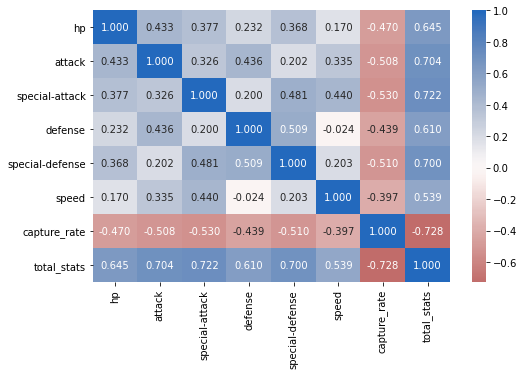

In [269]:
quan_vars = ['hp', 'attack', 'special-attack', 'defense', 'special-defense', 'speed', 'capture_rate', 
             'total_stats']

# correlation heatmap of quantitative variables
plt.figure(figsize= [8, 5])
sb.heatmap(df[quan_vars].corr(), annot= True, fmt= '.3f', cmap= 'vlag_r', center= 0)
plt.show()

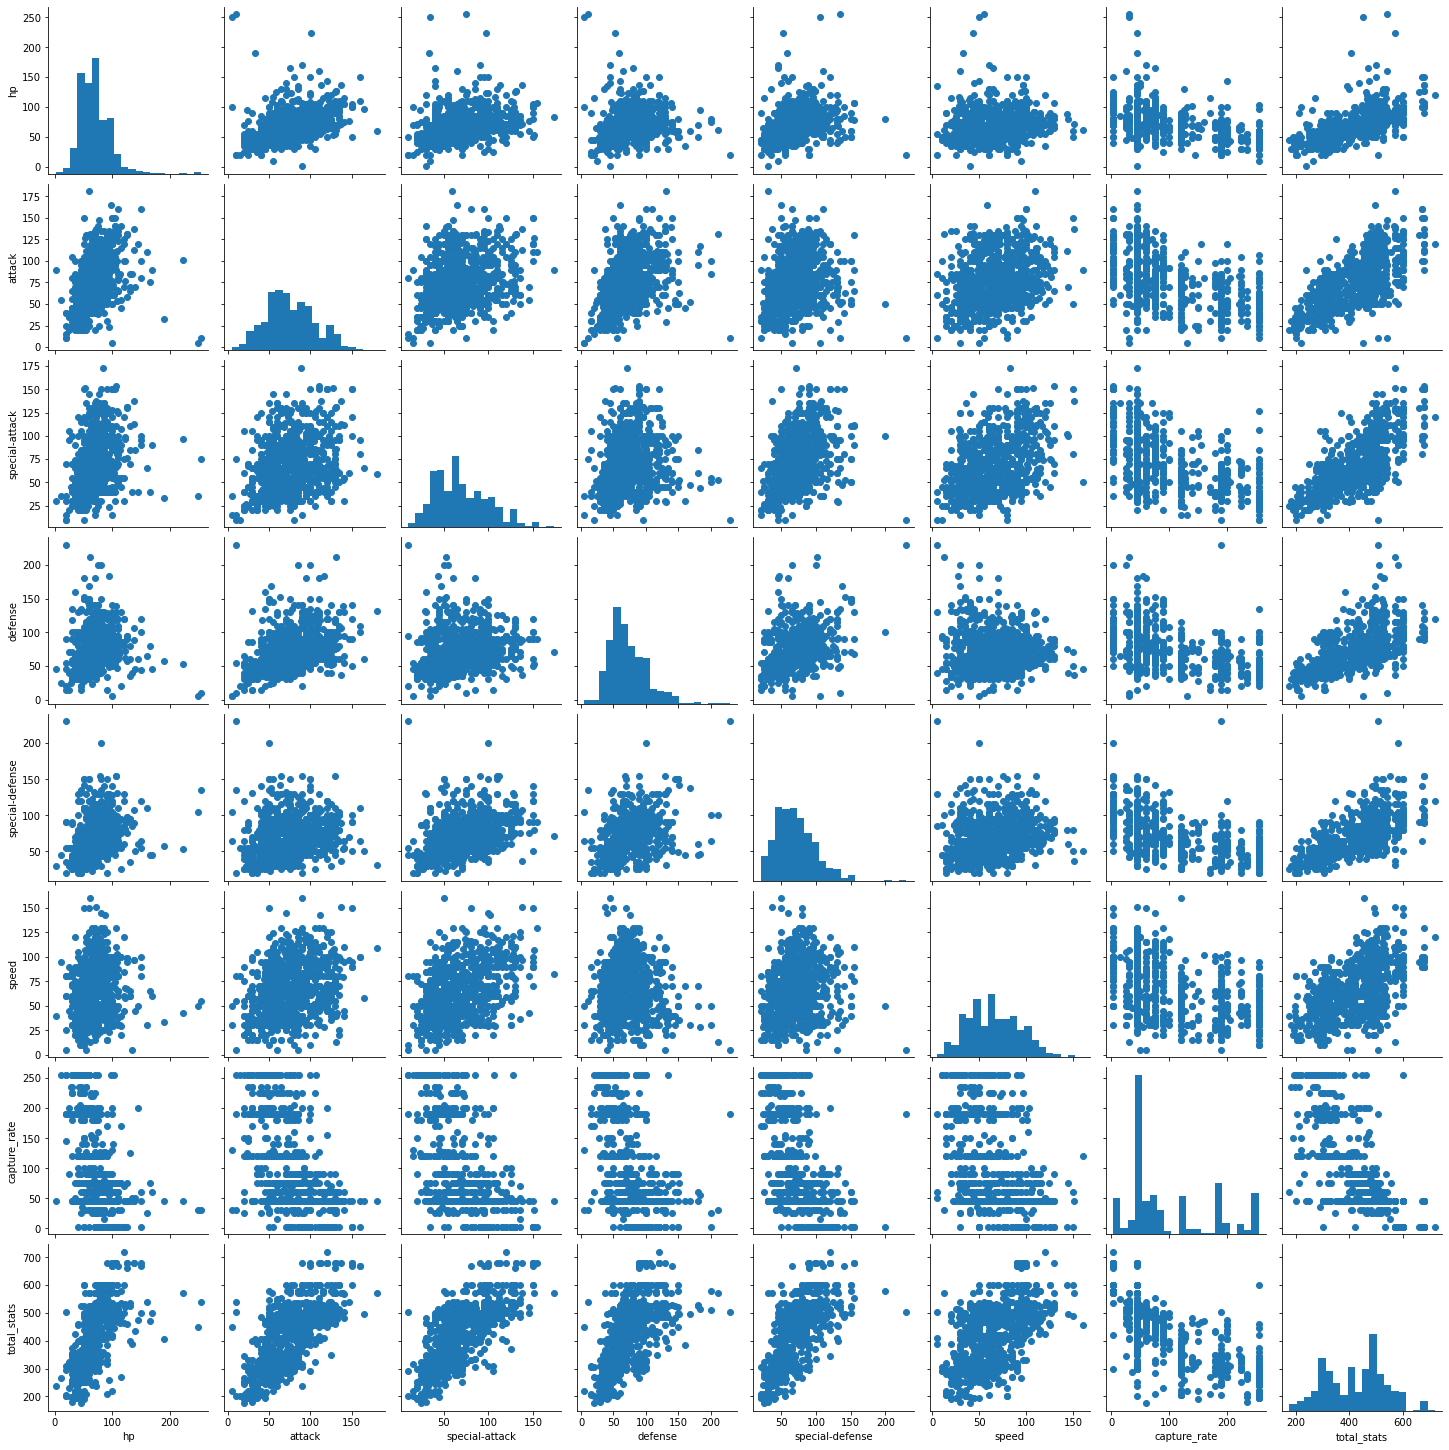

In [270]:
# matrix of correlation plots
matrix = sb.PairGrid(data= df, vars= quan_vars)
matrix = matrix.map_diag(plt.hist, bins= 20)
matrix.map_offdiag(plt.scatter);

Unsurprisingly, there are correlations between the individual battle stats and total battle stats. There is a fairly strong negative correlation between capture rate and total stats. This suggests the lower the harder a pokemon is to catch (lower capture rate) the stronger the pokemon typically is in battle (higher total stats).

Next I will look at how total stats and capture rate correlate to Pokemon type.

In [271]:
# melt type_1 and type_2 columns into 1 (while keeping all other columns) to create separate df to be used in
# type comparisons
id_vars = ['id', 'species', 'generation_id', 'hp', 'attack', 'special-attack', 'defense', 'special-defense', 'speed', 
           'total_stats', 'capture_rate', 'is_legendary', 'is_mythical', 'is_evolved', 'legendary_or_mythical']
types_df = df.melt(id_vars= id_vars, value_vars= ['type_1', 'type_2'], var_name= 'type_tier', value_name= 'type').dropna()

<Figure size 720x720 with 0 Axes>

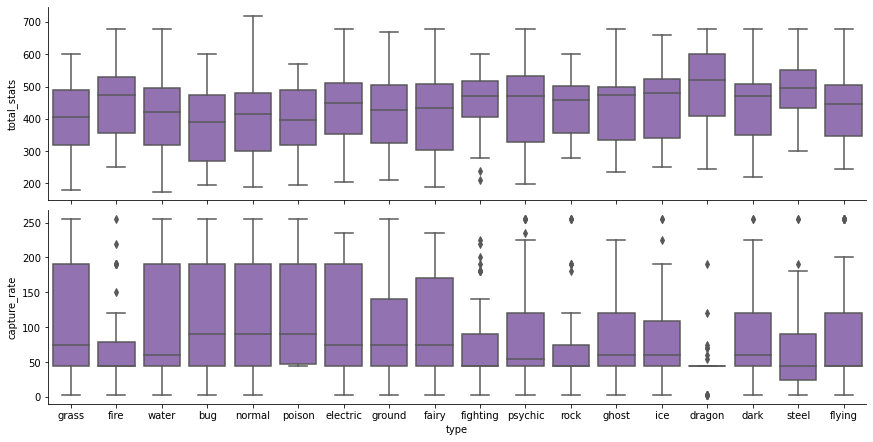

In [272]:
# box plots for total stats and capture rate vs Pokemon type
def boxgrid(x, y, **kwargs):
    std_color = sb.color_palette()[4]
    sb.boxplot(x, y, color= std_color)


plt.figure(figsize= [10, 10])
plots = sb.PairGrid(data= types_df, y_vars= ['total_stats', 'capture_rate'], x_vars= 'type', height= 3, aspect= 4)
plots.map(boxgrid)
plt.show();

Each Pokemon type appears to have fairly similar total stats, with dragon and steel types having slightly higher total stats than the rest. Water types, the most popular, have 1 of the largest ranges of total stats. Capture rates have very similar lower quartiles, but the fire, fighting, rock, and dragon types have significantly lower upper quartiles, meaning these types do not have as many easy to catch Pokemon as the other types. The steel type is the only type with a noticeably smaller lower quartile.

Next I will look at total stats vs legendary/mythical status.

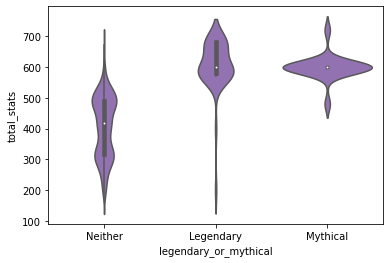

In [273]:
# make violin plot of total stats vs legendary/mythical status
sb.violinplot(data= df, x= 'legendary_or_mythical', y= 'total_stats', color= std_color);

Legendary and mythical Pokemon both have higher total stats than regular Pokemon and have similar stats to each other, but mythical Pokemon are highly clustered around 600 total stats. I now look at a violin plot versus capture rate instead of total stats.

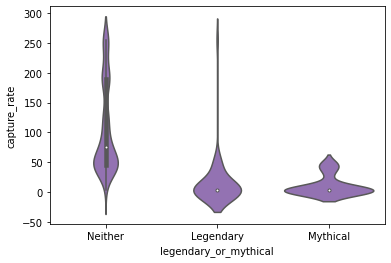

In [274]:
# make violin plot of capture rate vs legendary/mythical status
sb.violinplot(data= df, x= 'legendary_or_mythical', y= 'capture_rate', color= std_color);

Perhaps not surprisingly, this looks similar to the inverse of the total stats plot above. This is likely from the negative correlation between total stats and capture rate.

Next I will look at total stats versus if a pokemon is evolved or not.

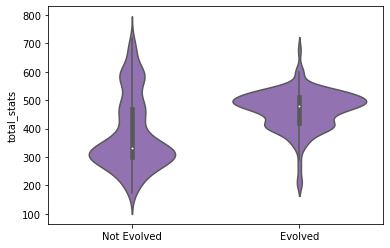

In [275]:
# violin plot of total stats vs pokemon that are evolved or not
sb.violinplot(data= df, x= 'is_evolved', y= 'total_stats', color= std_color)
plt.xticks([0, 1], ['Not Evolved', 'Evolved'])
plt.xlabel('');

Pokemon that are evolved have a much higher main cluster of total stat values than pokemon that are not evolved, suggesting Pokemon often get stronger when they evolve into a different species. Some Pokemon that are not evolved have higher total stats than most or all Pokemon that are. Legendary and mythical Pokemon do not evolve and were already observed to have high total stats, which likely explains this trend. 

Next I will look at total stats versus the generation the Pokemon was introduced.

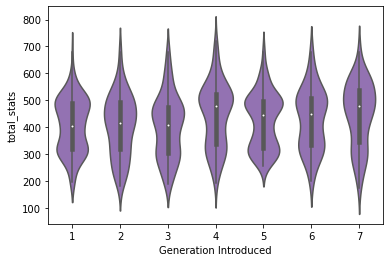

In [276]:
sb.violinplot(data= df, x= 'generation_id', y= 'total_stats', color= std_color)
plt.xlabel('Generation Introduced');

Most distributions look quite similar and are bimodal near 300 and 500 total stats. Generation 5 saw fewer "weak" Pokemon than other generations. Generation 7's mode near 500 is larger than other generations and larger than the one around 300. This generation saw a higher proportion of "stronger" pokemon introduced than the other generations.

Finally, I will look at Pokemon type versus attack/special attack, and versus defense/speical defense to see if certain types are more offensive or defensive than others.

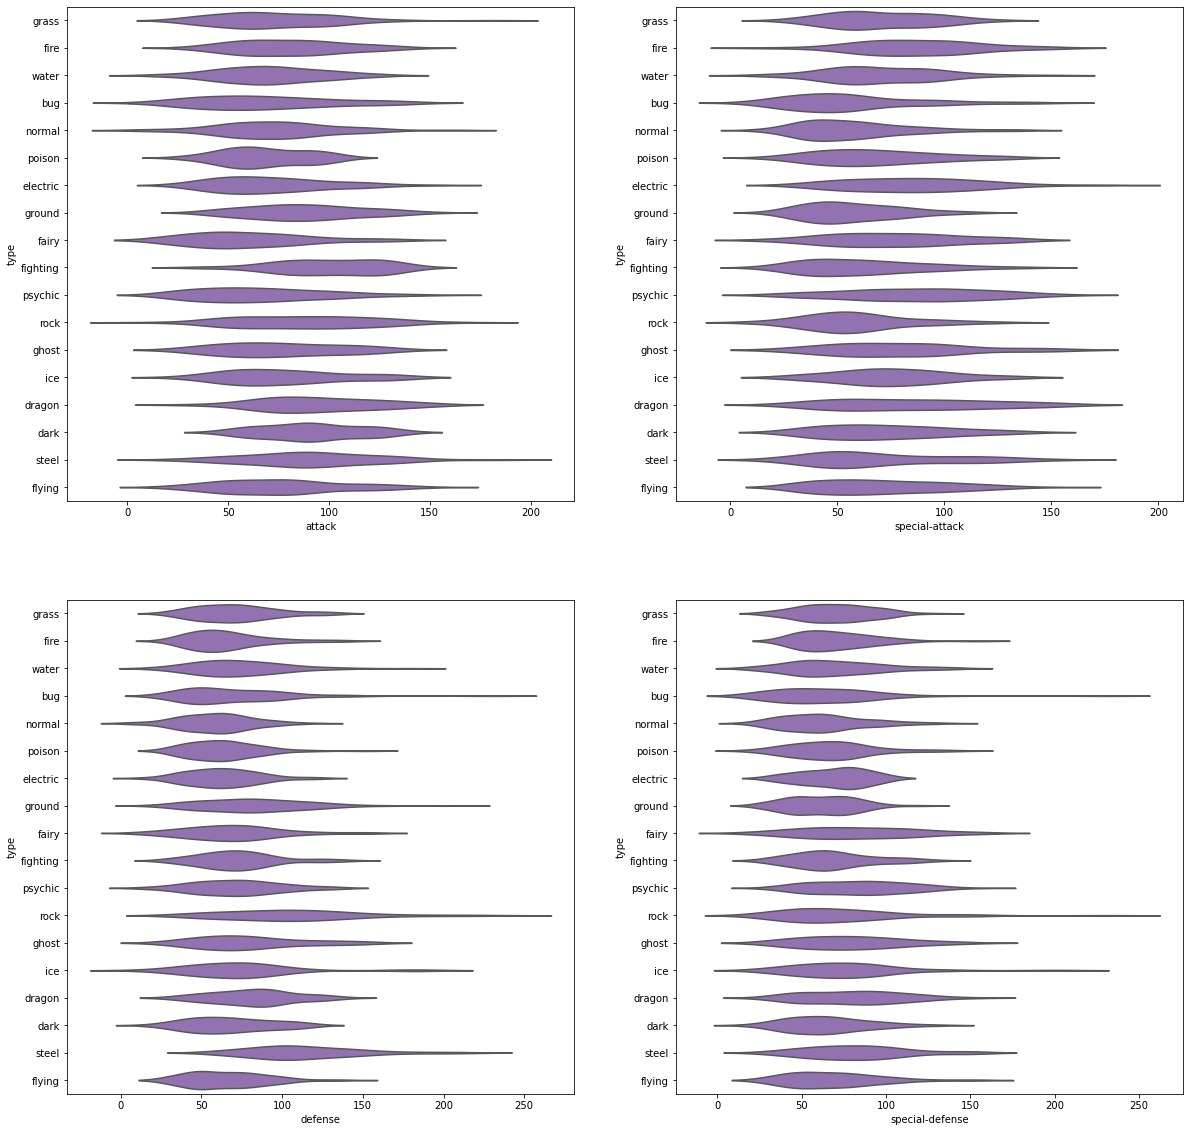

In [277]:
# matrix of violin plots for attack, special attack, defense, and special defense vs Pokemon type
fig, ax = plt.subplots(ncols= 2, nrows= 2, figsize= [20, 20])

# attack vs type
sb.violinplot(data= types_df, y= 'type', x= 'attack', color= std_color, ax= ax[0,0], inner= None)
# special attack vs type
sb.violinplot(data= types_df, y= 'type', x= 'special-attack', color= std_color, ax= ax[0,1], inner= None)
# defense vs type
sb.violinplot(data= types_df, y= 'type', x= 'defense', color= std_color, ax= ax[1,0], inner= None)
# special defense vs type
sb.violinplot(data= types_df, y= 'type', x= 'special-defense', color= std_color, ax= ax[1,1], inner= None)

There do not appear to be many significant differences between type and these stats. Rock and steel types appear to have slightly more defense than other types and fighting types appear to have slightly higher attack than others. Fire and electric types have slightly higher special attack. Special defense looks quite even across all types.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Total stats and capture rate have a fairly strong negative correlation. Dragon and steel Pokemon types had slightly higher total stats than other types of Pokemon. Total stats are higher to legendary and mythical Pokemon, while capture rate was lower for these Pokemon. Total stats are typically higher among Pokemon that evolved from a different species, except in the cases of legendary and mythical Pokemon, which do not evolve but have higher total stats than other Pokemon. Most generation introduced a similar spread of Pokemon with different total stat amounts, but generation 7 (the newest in this dataset) had a higher proportion of stronger Pokemon than the previous generations.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There appeared to be fairly weak positive correlations between attack and special attack and between defense and special defense. This suggests that a Pokemon is usually stronger or weaker in both types of attack or both types of defense rather than just a single type.

## Multivariate Exploration


I will first investigate how type, total stats, and capture rate are related.

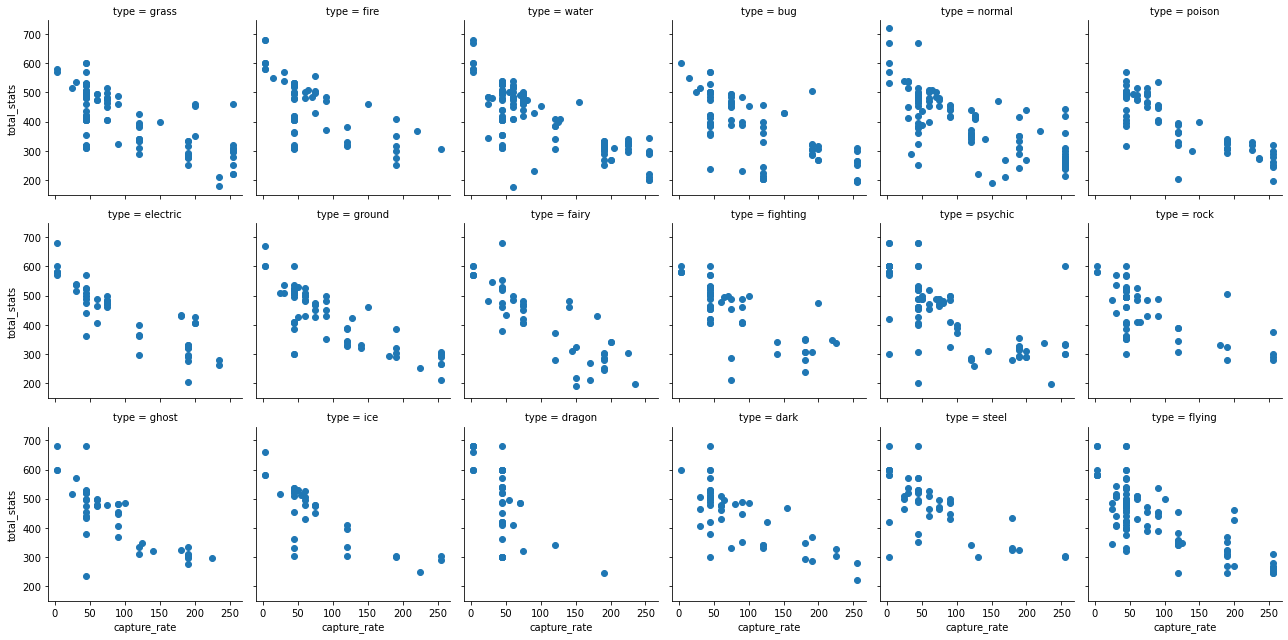

In [278]:
# plot facet grid of scatter plots capture rate vs total stats for each type
plots = sb.FacetGrid(data= types_df, col= 'type', col_wrap= 6)
plots.map(plt.scatter, 'capture_rate', 'total_stats');

The negative correlation is very weak for the dragon type, as most capture rates are 50 regardless of total stats. The correlation appears strongest for the poison, electric, and ice types. The correlations for all types appear to be linear, with clustering around a catch rate of 50.

Next, I will look at legendary/mythical status, type, and total stats.

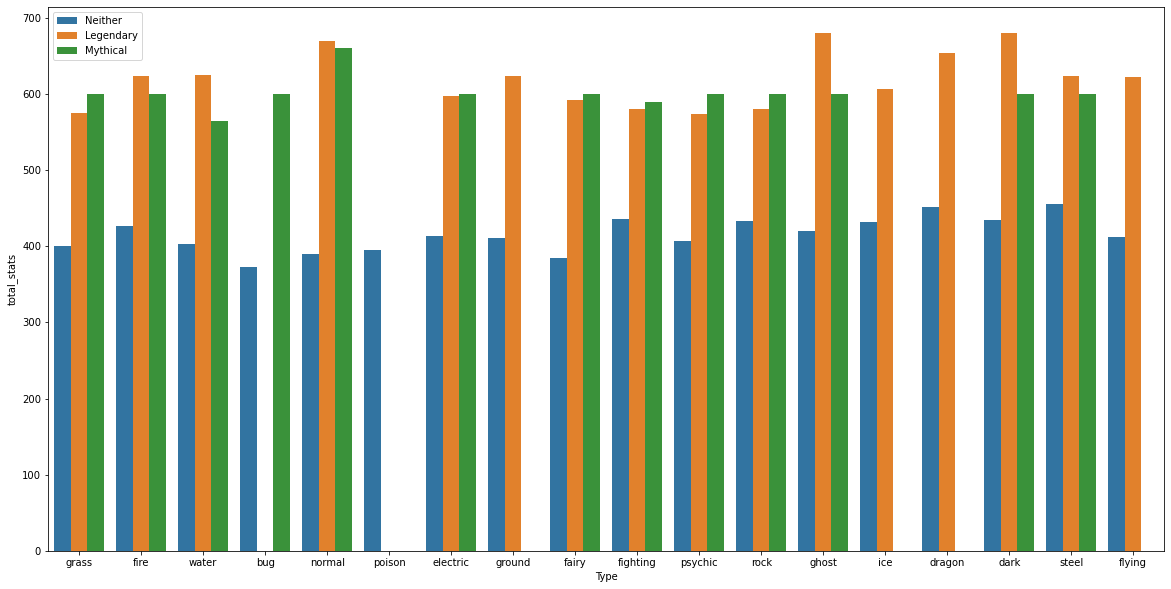

In [279]:
# plot triple bar graph for legendary/mythical status for each type versus total stats
plt.figure(figsize= [20, 10])
g = sb.barplot(data= types_df, x= 'type', y= 'total_stats', hue= 'legendary_or_mythical', ci= None)
plt.xlabel('Type')
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels);

The strongest Pokemon are legendaries from the ghost, dark, dragon, and normal types. There are no legendary or mythical posion-type Pokemon. Interestingly, the types with higher total stats for normal (not legendary/mythical) Pokemon are not the types that have the strongest legendary/mythical Pokemon, with the exception of the dragon type. In fact, the normal type ranks low in total stats for normal Pokemon, but very high in stats for both legendary and mythical Pokemon.

Finally, I will look at the relationship between total stats, generation, and if the pokemon has evolved from another species or not.

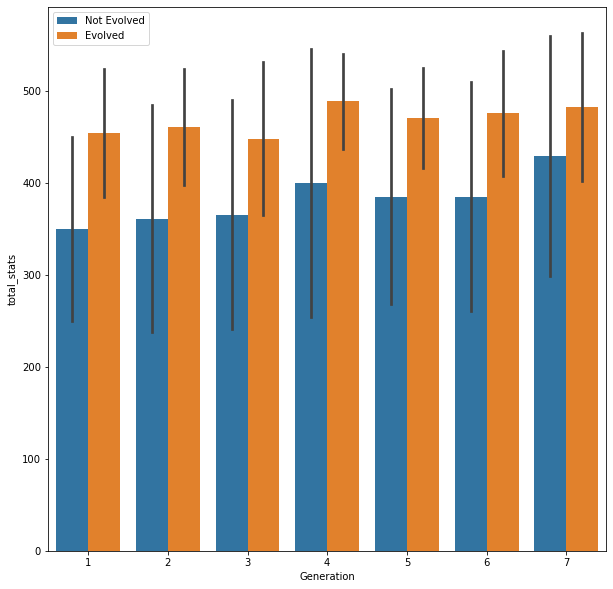

In [280]:
# plot double bar graph for evolved and not evolved pokemon in each generation versus total stats
plt.figure(figsize= [10, 10])
g = sb.barplot(data= df, x= 'generation_id', y= 'total_stats', hue= 'is_evolved', ci= 'sd')
plt.xlabel('Generation')
handles, labels = g.get_legend_handles_labels()
g.legend(handles, ('Not Evolved', 'Evolved'));

Generation 1 has the largest gap between evolved and nonevolved Pokemon in terms of total stats, and generation 7 the smallest. Generation 4 has the highest average total level for evolved Pokemon. Generation 7 has the 2nd highest forr evolved Pokemon and highest for nonevolved Pokemon. This supports the trend found earlier about generation 7 having a higher proportion of Pokemon with higher total stats. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The poison, electric, and ice types had the strongest negative correlation between total stats and catch rate, while the dragon type had the weakest correlation. Also, the normal Pokemon type had nearly the lowest total stats on average for Pokemon that are not legendary or mythical, yet had nearly the highest total stats for Pokemon that are legendary or mythical. This suggests that the strength of normal Pokemon of a certain type is not a predictor of the strength of that type's legendary/mythical Pokemon.

### Were there any interesting or surprising interactions between features?

Generation 1 Pokemon having the largest total stat gap between nonevolved and evolved Pokemon and generation 7 having the smallest gap was interesting. This suggests that for generation 1, picking Pokemon that evolve to use in your team is likely more important for battle strength than it is in generation 7. 